In [1]:
%matplotlib inline
from multisim.multisim import *
import matplotlib.pyplot as plt

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# set up system
nsteps = 500

tfaulton  = 1.0
tfaultoff = 1.2
tend      = 5.0

time   = np.linspace(0,tend,nsteps)

time_1 = [t for t in time if t < tfaulton]
time_2 = [t for t in time if t > tfaulton and t < tfaultoff]
time_3 = [t for t in time if t > tfaultoff]


# create system: this can be a file that we parse
dsystem = System()
dsystem.silent()

for i in range(2):
    dsystem.addbus(i)

dsystem.buses[0].setvinit(cmath.rect(1.04, 0))
dsystem.buses[1].setvinit(cmath.rect(1.01613, (np.pi/180.0)*-3.3252))

dsystem.addbranch(0, 1, 0.0001, 0.0576)
dsystem.createYbusReal()

gen = GenGENROU(0, 1.575, 1.512, 0.29, 0.39, 0.1733, 0.0787, 3.38, 0.0, 6.09, 1.0, 0.05, 0.15)
gen.setinitpow(1.06496, 0.45996)

load = ZLoad(1, (1.03123 + 1j*-0.37616))

dsystem.adddevice(gen)


dsystem.addload(load)

In [3]:
# Solve system
x = initialize_system(dsystem)
trajectory = np.zeros((len(x), len(time)))
trajectory[:,0] = np.copy(x)

x = integrate_system(x, dsystem, time_1, trajectory[:,1:])

fault_id = dsystem.applyBusFault(1, 0.1)
x = solve_steady_system(x, dsystem)
trajectory[:,len(time_1) - 1] = np.copy(x)

x = integrate_system(x, dsystem, time_2, trajectory[:,len(time_1):])

dsystem.removeBusFault(fault_id)
x = solve_steady_system(x, dsystem)
trajectory[:,len(time_1) + len(time_2) - 1] = np.copy(x)

x = integrate_system(x, dsystem, time_3, trajectory[:,len(time_1) + len(time_2):])

>>>APPLYING FAULT at bus: 1, z: 0.1.
Solve steady state
<<<REMOVING FAULT at bus: 1, z: 0.1.
Solve steady state


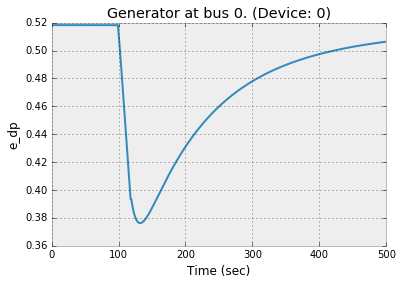

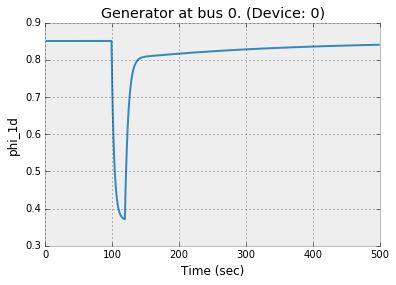

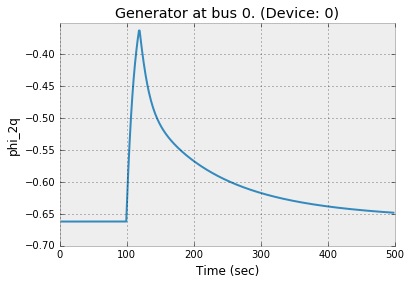

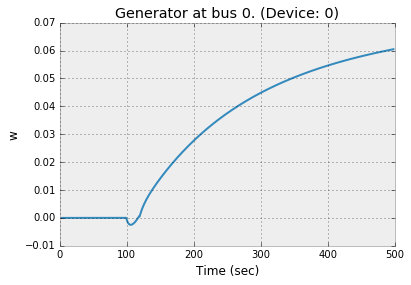

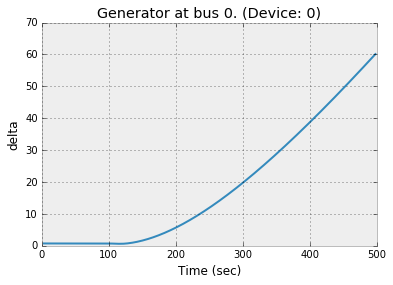

In [4]:
#plt.figure(figsize=(20,10))
#plt.plot(time[:-1], np.abs(trajectory[8,:-1] + 1j*trajectory[9,:-1]))
#plt.plot(time[:-1], np.abs(trajectory[12,:-1] + 1j*trajectory[13,:-1]))

generator_plots(dsystem, trajectory[:,:-1], 0)